# Explore here

In [1]:
!pip install seaborn
!pip install scikit-learn
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [3]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df = pd.read_csv(url)

In [4]:
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


### En un inicio, se decidió trabajar con los datos en brutos (no porcentajes). Para ello se transformaron algunas variables porcentuales para expresar los datos en bruto, pero dada la heterogénea distribución de poblaciones, se encontraron problemas en el análisis. 
### Por este motivo, vamos a trabajar con variables procentuales, prescindiendo de las numéricas y realizando las transformaciones necesarias para no perder datos relevantes.
## Elegimos 'anycondition_prevalence' como variable objetivo

Estadísticas descriptivas de 'anycondition_prevalence':
count    3140.000000
mean       46.793917
std         6.379448
min        22.000000
25%        42.900000
50%        47.200000
75%        51.000000
max        66.200000
Name: anycondition_prevalence, dtype: float64


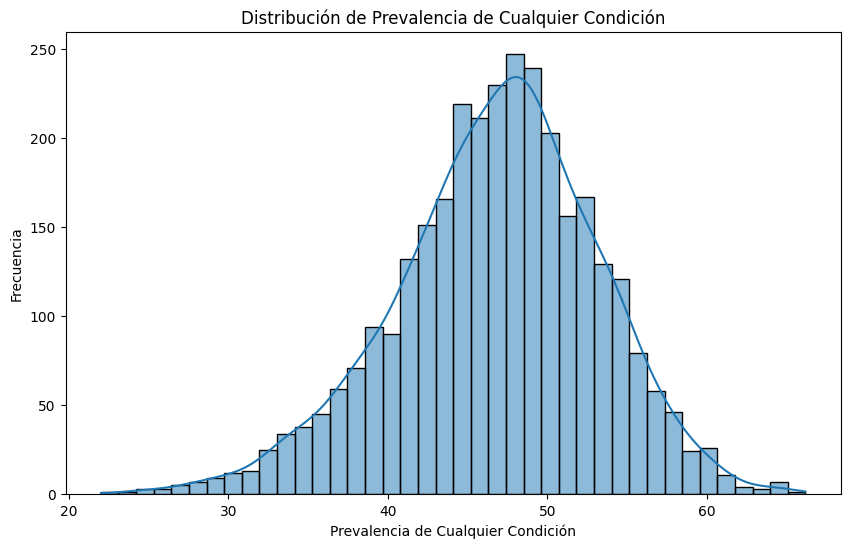

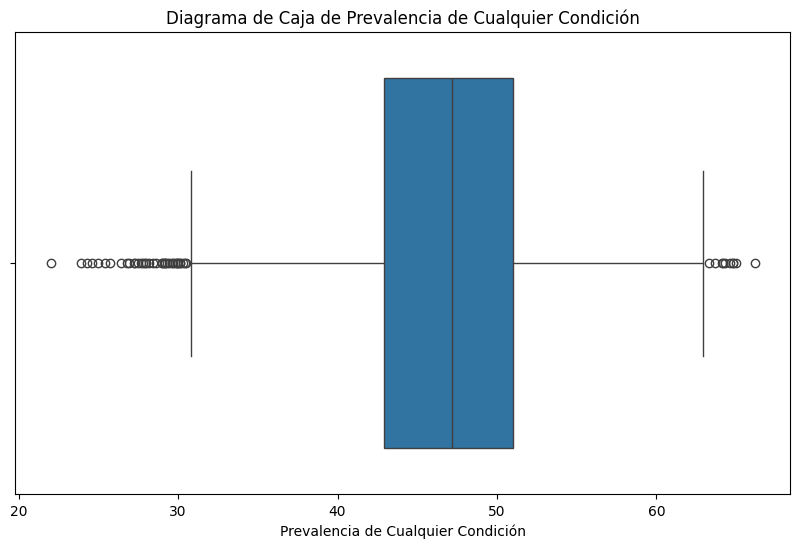

In [5]:
# Estadísticas descriptivas de 'anycondition_prevalence'
print("Estadísticas descriptivas de 'anycondition_prevalence':")
print(df['anycondition_prevalence'].describe())

# Histograma de 'anycondition_prevalence'
plt.figure(figsize=(10, 6))
sns.histplot(df['anycondition_prevalence'], kde=True)
plt.title('Distribución de Prevalencia de Cualquier Condición')
plt.xlabel('Prevalencia de Cualquier Condición')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja de 'anycondition_prevalence'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['anycondition_prevalence'])
plt.title('Diagrama de Caja de Prevalencia de Cualquier Condición')
plt.xlabel('Prevalencia de Cualquier Condición')
plt.show()

In [6]:
# Asegurarse de que pandas no trunque la visualización
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)

# Imprimir los tipos de todas las columnas del dataframe 'df'
print(df.dtypes)

fips                                                                               int64
TOT_POP                                                                            int64
0-9                                                                                int64
0-9 y/o % of total pop                                                           float64
19-Oct                                                                             int64
10-19 y/o % of total pop                                                         float64
20-29                                                                              int64
20-29 y/o % of total pop                                                         float64
30-39                                                                              int64
30-39 y/o % of total pop                                                         float64
40-49                                                                              int64
40-49 y/o % of total 

In [7]:
df.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [8]:
# Eliminar columnas que dependen de la variable objetivo 
columns_to_drop = [
    "anycondition_Lower 95% CI", "anycondition_Upper 95% CI", "anycondition_number",
    "Obesity_prevalence", "Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "Obesity_number",
    "Heart disease_prevalence", "Heart disease_Lower 95% CI", "Heart disease_Upper 95% CI", "Heart disease_number",
    "COPD_prevalence", "COPD_Lower 95% CI", "COPD_Upper 95% CI", "COPD_number",
    "diabetes_prevalence", "diabetes_Lower 95% CI", "diabetes_Upper 95% CI", "diabetes_number",
    "CKD_prevalence", "CKD_Lower 95% CI", "CKD_Upper 95% CI", "CKD_number",
    "COUNTY_NAME", "STATE_NAME"
]
df = df.drop(columns=columns_to_drop)

In [9]:
# Transformamos la variables numéricas que nos interesan a porcentuales
df['ICU Beds_x'] = (df['ICU Beds_x']*100 / df['TOT_POP']).astype('float64')
df['county_pop2018_18 and older'] = (df['county_pop2018_18 and older']*100 / df['TOT_POP']).astype('float64')

In [10]:
# Eliminamos todas las columnas de datos en bruto (conservamos la que nos da información sobre el tipo de población rural/urbana)
int64_columns_to_drop = [col for col in df.select_dtypes(include=['int64']).columns if col != 'Urban_rural_code']
df = df.drop(columns=int64_columns_to_drop)

In [11]:
df.head(5)

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Percent of Population Aged 60+,county_pop2018_18 and older,anycondition_prevalence,Urban_rural_code
0,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,76.725239,19.630942,0.480207,1.224798,0.111509,1.827305,11.8,9.6,2.2,0.0,0.7,0.6,11.3,32.6,28.4,27.7,13.8,19.3,19.5,3.6,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,0.010791,19.1,76.325965,47.6,3
1,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,87.285228,8.940382,0.772399,1.150343,0.066966,1.784682,10.5,10.3,0.1,0.5,24.3,24.8,9.7,27.6,31.3,31.3,9.8,13.9,13.1,3.6,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,0.023392,26.3,78.392089,40.2,4
2,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,49.069571,48.398376,0.659137,0.454162,0.184880,1.233873,10.4,12.9,-2.5,0.5,-9.1,-8.6,27.0,35.7,25.1,12.2,30.9,43.9,36.7,5.2,68.9,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,0.020096,23.5,79.132672,57.5,6
3,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,76.834821,21.294643,0.437500,0.236607,0.116071,1.080357,11.1,11.4,-0.3,0.4,-7.0,-6.6,16.8,47.3,24.4,11.5,21.8,27.8,26.3,4.0,92.3,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0.000000,21.1,79.522321,51.6,2
4,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,95.878285,1.642462,0.653527,0.319848,0.121024,1.384855,11.8,11.4,0.3,0.1,-0.2,0.0,19.8,34.0,33.5,12.6,13.2,18.0,15.5,3.5,101.1,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,0.010373,23.6,76.846473,46.3,2


In [12]:
# Transformamos la variable categórica
df = pd.get_dummies(df, columns=['Urban_rural_code'], drop_first=True)

In [13]:
df.head(5)

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Percent of Population Aged 60+,county_pop2018_18 and older,anycondition_prevalence,Urban_rural_code_2,Urban_rural_code_3,Urban_rural_code_4,Urban_rural_code_5,Urban_rural_code_6
0,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,76.725239,19.630942,0.480207,1.224798,0.111509,1.827305,11.8,9.6,2.2,0.0,0.7,0.6,11.3,32.6,28.4,27.7,13.8,19.3,19.5,3.6,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,0.010791,19.1,76.325965,47.6,False,True,False,False,False
1,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,87.285228,8.940382,0.772399,1.150343,0.066966,1.784682,10.5,10.3,0.1,0.5,24.3,24.8,9.7,27.6,31.3,31.3,9.8,13.9,13.1,3.6,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,0.023392,26.3,78.392089,40.2,False,False,True,False,False
2,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,49.069571,48.398376,0.659137,0.454162,0.184880,1.233873,10.4,12.9,-2.5,0.5,-9.1,-8.6,27.0,35.7,25.1,12.2,30.9,43.9,36.7,5.2,68.9,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,0.020096,23.5,79.132672,57.5,False,False,False,False,True
3,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,76.834821,21.294643,0.437500,0.236607,0.116071,1.080357,11.1,11.4,-0.3,0.4,-7.0,-6.6,16.8,47.3,24.4,11.5,21.8,27.8,26.3,4.0,92.3,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0.000000,21.1,79.522321,51.6,True,False,False,False,False
4,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,95.878285,1.642462,0.653527,0.319848,0.121024,1.384855,11.8,11.4,0.3,0.1,-0.2,0.0,19.8,34.0,33.5,12.6,13.2,18.0,15.5,3.5,101.1,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,0.010373,23.6,76.846473,46.3,True,False,False,False,False


In [14]:
# Convertimos las columnas del OneHotEncoding a 0 y 1
boolean_columns = ['Urban_rural_code_2', 'Urban_rural_code_3', 'Urban_rural_code_4', 'Urban_rural_code_5', 'Urban_rural_code_6']

# Convertir valores booleanos a enteros (0 y 1)
for col in boolean_columns:
    df[col] = df[col].astype(int)

In [15]:
# Eliminamos columnas redundantes (cada grupo cuya suma sea el 100%, tiene una columna redundante)
columns_to_drop = ['80+ y/o % of total pop', '% Hawaiian/PI-alone', 'R_DOMESTIC_MIG_2018', 'R_INTERNATIONAL_MIG_2018']
df = df.drop(columns=columns_to_drop)

In [16]:
df.head(5)

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Two or more races,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Percent of Population Aged 60+,county_pop2018_18 and older,anycondition_prevalence,Urban_rural_code_2,Urban_rural_code_3,Urban_rural_code_4,Urban_rural_code_5,Urban_rural_code_6
0,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,76.725239,19.630942,0.480207,1.224798,1.827305,11.8,9.6,2.2,0.6,11.3,32.6,28.4,27.7,13.8,19.3,19.5,3.6,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,0.010791,19.1,76.325965,47.6,0,1,0,0,0
1,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,87.285228,8.940382,0.772399,1.150343,1.784682,10.5,10.3,0.1,24.8,9.7,27.6,31.3,31.3,9.8,13.9,13.1,3.6,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,0.023392,26.3,78.392089,40.2,0,0,1,0,0
2,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,49.069571,48.398376,0.659137,0.454162,1.233873,10.4,12.9,-2.5,-8.6,27.0,35.7,25.1,12.2,30.9,43.9,36.7,5.2,68.9,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,0.020096,23.5,79.132672,57.5,0,0,0,0,1
3,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,76.834821,21.294643,0.437500,0.236607,1.080357,11.1,11.4,-0.3,-6.6,16.8,47.3,24.4,11.5,21.8,27.8,26.3,4.0,92.3,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0.000000,21.1,79.522321,51.6,1,0,0,0,0
4,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,95.878285,1.642462,0.653527,0.319848,1.384855,11.8,11.4,0.3,0.0,19.8,34.0,33.5,12.6,13.2,18.0,15.5,3.5,101.1,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,0.010373,23.6,76.846473,46.3,1,0,0,0,0


In [17]:
# Definir X e y
X = df.drop(['anycondition_prevalence'], axis=1)  # Excluyendo la variable objetivo
y = df['anycondition_prevalence']  # Variable objetivo

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Calcula el VIF para cada variable explicativa en X_train
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

                                              feature           VIF
13                                       R_birth_2018  55086.408807
14                                       R_death_2018  47979.911821
40                        county_pop2018_18 and older  43474.786681
29  Active Patient Care Primary Care Physicians pe...  15586.586695
28  Active Primary Care Physicians per 100000 Popu...  15228.906055
8                                       % White-alone  12458.163184
18  Percent of adults with a high school diploma o...  12227.986954
19  Percent of adults completing some college or a...   9694.256403
27  Total Active Patient Care Physicians per 10000...   8512.843320
26  Active Physicians per 100000 Population 2018 (...   7377.799601
15                                 R_NATURAL_INC_2018   6977.319866
20  Percent of adults with a bachelor's degree or ...   5667.732044
0                              0-9 y/o % of total pop   2357.438760
30  Active General Surgeons per 100000 Populatio

## ANÁLISIS
#### El VIF parece excesivo, sin embargo, como el objetivo del ejercicio es emplear el método Lasso para reducir el número de variables, consideramos que éste puede ser un buen punto de partida.

In [19]:
# Definir X e y
X = df.drop(['anycondition_prevalence'], axis=1)
y = df['anycondition_prevalence']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Lasso
lasso_reg = Lasso(alpha=1.0)  # Considera ajustar alpha según sea necesario
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluar los modelos
print("Linear Regression R^2:", r2_score(y_test, y_pred_lin))
print("Lasso Regression R^2:", r2_score(y_test, y_pred_lasso))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Linear Regression R^2: 0.800556554570163
Lasso Regression R^2: 0.781141866113177
Linear Regression RMSE: 2.847501633524742
Lasso Regression RMSE: 2.9828776753521073


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+01, tolerance: 1.022e+01
  model = cd_fast.enet_coordinate_descent(


In [20]:
# Muestra los coeficientes del modelo Lasso
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_reg.coef_})
print(lasso_coefs.sort_values(by='Coefficient', ascending=False))

                                              Feature  Coefficient
14                                       R_death_2018     0.265293
22                                     PCTPOV017_2018     0.232241
18  Percent of adults with a high school diploma o...     0.072337
17  Percent of adults with less than a high school...     0.047582
25          Med_HH_Income_Percent_of_State_Total_2018     0.040721
26  Active Physicians per 100000 Population 2018 (...     0.034145
9                                       % Black-alone     0.027750
39                     Percent of Population Aged 60+     0.004199
37                 Total Specialist Physicians (2019)     0.001760
36  Family Medicine/General Practice Primary Care ...     0.000413
38                                         ICU Beds_x    -0.000000
24                             Unemployment_rate_2018     0.000000
34                             Total Hospitals (2019)     0.000000
32                   Total nurse practitioners (2019)     0.00

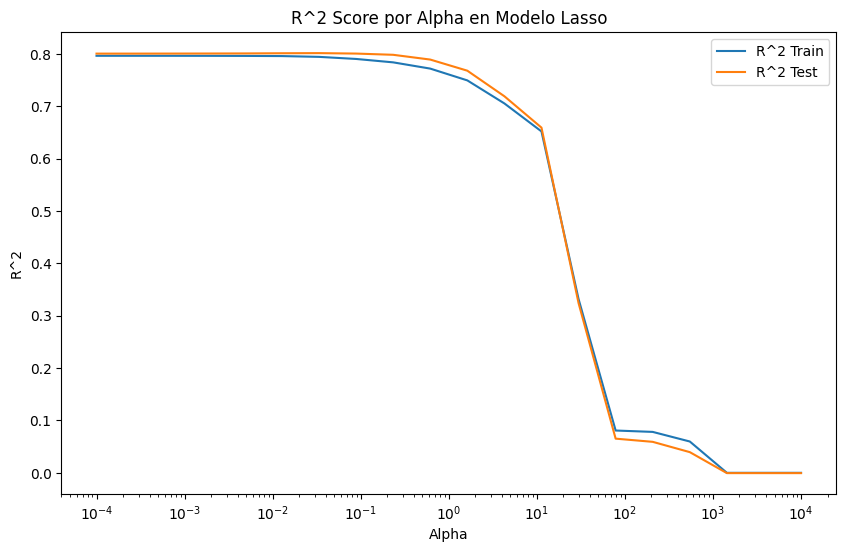

In [21]:
# Rango de valores alpha para probar
alphas = np.logspace(-4, 4, 20)
# Listas para guardar los scores R^2
r2_train = []
r2_test = []

# Entrenar un modelo Lasso para cada valor de alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(X_train, y_train)
    r2_train.append(lasso.score(X_train, y_train))
    r2_test.append(lasso.score(X_test, y_test))

# Trazar los resultados
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_train, label='R^2 Train')
plt.plot(alphas, r2_test, label='R^2 Test')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.title('R^2 Score por Alpha en Modelo Lasso')
plt.legend()
plt.show()

## ANÁLISIS
#### El mejor alpha parece estar en el rango 10e-2 y 10.

In [22]:
# Selecciona el mejor valor de alpha basado en el gráfico que proporcionaste
best_alpha = alphas[np.argmax(r2_test)]  # Esto toma el alpha con el mayor R^2 de prueba

# Entrena el modelo Lasso con el mejor valor de alpha
best_lasso = Lasso(alpha=best_alpha, max_iter=100000)
best_lasso.fit(X_train, y_train)

# Predice en el conjunto de prueba
y_pred_best_lasso = best_lasso.predict(X_test)

# Evalúa el rendimiento del mejor modelo Lasso
print("Mejor Lasso R^2:", r2_score(y_test, y_pred_best_lasso))
print("Mejor Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_lasso)))

# Imprimir los coeficientes del mejor modelo Lasso
best_lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_lasso.coef_})
print(best_lasso_coefs.sort_values(by='Coefficient', ascending=False))

Mejor Lasso R^2: 0.8015216191668131
Mejor Lasso RMSE: 2.8406040507238037
                                              Feature  Coefficient
14                                       R_death_2018     0.400119
30  Active General Surgeons per 100000 Population ...     0.359337
24                             Unemployment_rate_2018     0.267710
22                                     PCTPOV017_2018     0.169796
21                                     PCTPOVALL_2018     0.158192
41                                 Urban_rural_code_2     0.136651
28  Active Primary Care Physicians per 100000 Popu...     0.121326
17  Percent of adults with less than a high school...     0.111604
4                            40-49 y/o % of total pop     0.106901
12                                % Two or more races     0.085891
13                                       R_birth_2018     0.071829
34                             Total Hospitals (2019)     0.069060
18  Percent of adults with a high school diploma o...   

## ANÁLISIS
#### Hemos mejorado sensiblemente el rendimiento frente al modelo de regresión lineal. Podemos observar como varias variables han sido reducidas a 0, así como la variable que más peso tiene (en número de defunciones, lo cual es lógico acorde a nuestra variable objetivo)
### Vamos a intentar afinar aún más el alpha del Lasso, al tiempo que validamos el modelo mediante validación cruzada.

In [25]:
# Definir el modelo LassoCV
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5, max_iter=100000, random_state=42)

# Ajustar el modelo LassoCV a los datos de entrenamiento
lasso_cv.fit(X_train, y_train)

# El mejor alpha encontrado
best_alpha_cv = lasso_cv.alpha_

# Entrenar el modelo Lasso usando el mejor alpha
lasso_optimized = Lasso(alpha=best_alpha_cv, max_iter=100000)
lasso_optimized.fit(X_train, y_train)

# Evaluar el modelo optimizado en el conjunto de prueba
y_pred_lasso_optimized = lasso_optimized.predict(X_test)
print("Optimized Lasso R^2:", r2_score(y_test, y_pred_lasso_optimized))
print("Optimized Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso_optimized)))

# Mostrar los coeficientes del modelo optimizado
optimized_coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_optimized.coef_
}).sort_values(by='Coefficient', ascending=False)
print(optimized_coefs)

Optimized Lasso R^2: 0.8015099155443467
Optimized Lasso RMSE: 2.8406878000650884
                                              Feature  Coefficient
14                                       R_death_2018     0.393120
30  Active General Surgeons per 100000 Population ...     0.368292
41                                 Urban_rural_code_2     0.323179
24                             Unemployment_rate_2018     0.294470
22                                     PCTPOV017_2018     0.214114
21                                     PCTPOVALL_2018     0.156624
28  Active Primary Care Physicians per 100000 Popu...     0.138521
17  Percent of adults with less than a high school...     0.112295
13                                       R_birth_2018     0.090254
4                            40-49 y/o % of total pop     0.083775
34                             Total Hospitals (2019)     0.074068
12                                % Two or more races     0.068397
18  Percent of adults with a high school diploma

## ANÁLISIS
#### Hemos obtenido resultados prácticamente idénticos, lo cual indica que el modelo ya está bastante ajustado.

### ANÁLISIS DE LAS VARIABLES
Las tasas de mortalidad (R_death_2018) y la disponibilidad de cirujanos generales están positivamente correlacionadas con la variable objetivo.

Variables relacionadas con el nivel educativo, la pobreza y la tasa de desempleo también son predictores significativos.

Las variables de código urbano-rural muestran que hay diferencias significativas entre las áreas urbanas y rurales en relación con la variable objetivo.

Variables demográficas como el porcentaje de la población en ciertos grupos de edad y de ciertas razas tienen una relación negativa con la variable objetivo.